In [1]:
from utils.epg import *
import icecream as ic
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from copy import copy
from scipy.optimize import curve_fit

In [2]:
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}"     # xcolor for colours
}
matplotlib.rcParams.update(pgf_with_latex)


In [3]:
fname = "~/Dropbox (MIT)/data/dvcs_inb.root"
epg = epgFromROOT(fname)
dvpi0 = epg.getDVpi0()
dvcs = epg.getDVCS(sub2g=True)


In [56]:
fnameoutb = "~/Dropbox (MIT)/data/dvcs_outb.root"
epgoutb = epgFromROOT(fnameoutb)
dvpi0outb = epgoutb.getDVpi0()
dvcsoutb = epgoutb.getDVCS(sub2g=True)


In [4]:
fname_mc = "~/Dropbox (MIT)/data/MC/Feb2020/dvcsRadRECinb.root"
# fname_mc = "~/Dropbox (MIT)/data/dvcs_mc_inb.root"
epg_mc = epgFromROOT(fname_mc, rec=True)
# dvpi0_mc = epg_mc.getDVpi0()
dvcs_mc = epg_mc.getDVCS()

In [175]:
dvcs_gen = epg_mc.df_MC

In [176]:
dvcs_gen.keys()

Index(['MCEpx', 'MCEpy', 'MCEpz', 'MCEvx', 'MCEvy', 'MCEvz', 'MCPpx', 'MCPpy',
       'MCPpz', 'event', 'MCGpx', 'MCGpy', 'MCGpz'],
      dtype='object')

In [78]:
ele = [dvcs["Epx"], dvcs["Epy"], dvcs["Epz"]]
dvcs["Etheta"] = getTheta(ele)
dvcs["Ephi"] = getPhi(ele)
pro = [dvcs["Ppx"], dvcs["Ppy"], dvcs["Ppz"]]
dvcs["Ptheta"] = getTheta(pro)
dvcs["Pphi"] = getPhi(pro)
gam = [dvcs["Gpx"], dvcs["Gpy"], dvcs["Gpz"]]
dvcs["Gtheta"] = getTheta(gam)
dvcs["Gphi"] = getPhi(gam)

In [79]:
ele = [dvcs_mc["Epx"], dvcs_mc["Epy"], dvcs_mc["Epz"]]
dvcs_mc["Etheta"] = getTheta(ele)
dvcs_mc["Ephi"] = getPhi(ele)
pro = [dvcs_mc["Ppx"], dvcs_mc["Ppy"], dvcs_mc["Ppz"]]
dvcs_mc["Ptheta"] = getTheta(pro)
dvcs_mc["Pphi"] = getPhi(pro)
gam = [dvcs_mc["Gpx"], dvcs_mc["Gpy"], dvcs_mc["Gpz"]]
dvcs_mc["Gtheta"] = getTheta(gam)
dvcs_mc["Gphi"] = getPhi(gam)

In [5]:
fname_mc2 = "~/Dropbox (MIT)/data/MC/Feb2020/dvcsNonRadRECinb.root"
epg_mc2 = epgFromROOT(fname_mc2, rec=False)
# dvpi0_mc2 = epg_mc2.getDVpi0()
dvcs_mc2 = epg_mc2.getDVCS()
ele = [dvcs_mc2["Epx"], dvcs_mc2["Epy"], dvcs_mc2["Epz"]]
dvcs_mc2["Etheta"] = getTheta(ele)
dvcs_mc2["Ephi"] = getPhi(ele)
pro = [dvcs_mc2["Ppx"], dvcs_mc2["Ppy"], dvcs_mc2["Ppz"]]
dvcs_mc2["Ptheta"] = getTheta(pro)
dvcs_mc2["Pphi"] = getPhi(pro)
gam = [dvcs_mc2["Gpx"], dvcs_mc2["Gpy"], dvcs_mc2["Gpz"]]
dvcs_mc2["Gtheta"] = getTheta(gam)
dvcs_mc2["Gphi"] = getPhi(gam)

In [80]:
df_epg = epg.df_epg
df_epg1 = epg_mc.df_epg


In [81]:
cut1_Wagon1 = (df_epg1["ME_epg"]>-1) & (df_epg1["ME_epg"]<2)
cut1_Wagon2 = (df_epg1["MM2_eg"]>1/16) & (df_epg1["MM2_eg"]<4)
cut1_Wagon3 = (df_epg1["MM2_epg"]>-0.1) & (df_epg1["MM2_epg"]<0.1)
cut1_Wagon4 = (df_epg1["MPt"]<0.75)
cut1_Wagon5 = (df_epg1["reconGam"]<7.5)
cut1 = cut1_Wagon1 & cut1_Wagon2 & cut1_Wagon3 & cut1_Wagon4 & cut1_Wagon5
df_epg_mc1 = df_epg1[cut1]

In [184]:
# df_epg2 = epg_mc2.df_epg
# cut2_Wagon1 = (df_epg2["ME_epg"]>-1) & (df_epg2["ME_epg"]<2)
# cut2_Wagon2 = (df_epg2["MM2_eg"]>1/16) & (df_epg2["MM2_eg"]<4)
# cut2_Wagon3 = (df_epg2["MM2_epg"]>-0.1) & (df_epg2["MM2_epg"]<0.1)
# cut2_Wagon4 = (df_epg2["MPt"]<0.75)
# cut2_Wagon5 = (df_epg2["reconGam"]<7.5)
# cut2 = cut2_Wagon1 & cut2_Wagon2 & cut2_Wagon3 & cut2_Wagon4 & cut2_Wagon5
# df_epg_mc2 = df_epg2[cut2]

<AxesSubplot:>

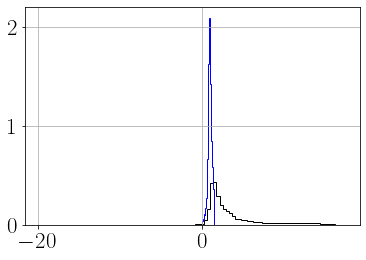

In [10]:
# var = "coneAngle"
var = "MM2_eg"
bins = 100
bins=np.linspace(-0.01, 1.5, 101)
df_epg[var].hist(bins=100, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
df_epg1[var].hist(bins=bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
# df_epg2[var].hist(bins=bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')

In [82]:
# dvcsFD = dvcs[(dvcs["Pstat"]<4000) &  (dvcs["t2"]<1) &  (dvcs["xB"]<0.85) &  (dvcs["Q2"]<14)]
# dvcsFD_mc = dvcs_mc[(dvcs_mc["Pstat"]<4000) & (dvcs_mc["t2"]<1)&  (dvcs_mc["xB"]<0.85) &  (dvcs_mc["Q2"]<14)]
# dvcsFD_mc2 = dvcs_mc2[(dvcs_mc2["Pstat"]<4000) & (dvcs_mc2["t2"]<1)&  (dvcs_mc2["xB"]<0.85) &  (dvcs_mc2["Q2"]<14)]
# dvpi0FD = dvpi0[(dvpi0["Pstat"]<4000)]
# dvcsCD = dvcs[(dvcs["Pstat"]>4000)&  (dvcs["t2"]<1) &  (dvcs["xB"]<0.85) &  (dvcs["Q2"]<14)]
# dvcsCD_mc = dvcs_mc[(dvcs_mc["Pstat"]>4000) & (dvcs_mc["t2"]<1)&  (dvcs_mc["xB"]<0.85) &  (dvcs_mc["Q2"]<14)]
# dvcsCD_mc2 = dvcs_mc2[(dvcs_mc2["Pstat"]>4000) & (dvcs_mc2["t2"]<1)&  (dvcs_mc2["xB"]<0.85) &  (dvcs_mc2["Q2"]<14)]
dvcsCDFT = dvcs[(dvcs["Pstat"]>4000) & (dvcs["Gstat"]<2000)]
dvcsCDFT_mc = dvcs_mc[(dvcs_mc["Pstat"]>4000) & (dvcs_mc["Gstat"]<2000)]
dvcsCDFD = dvcs[(dvcs["Pstat"]>4000) & (dvcs["Gstat"]>2000)]
dvcsCDFD_mc = dvcs_mc[(dvcs_mc["Pstat"]>4000) & (dvcs_mc["Gstat"]>2000)]
# dvcsFDFT = dvcs[(dvcs["Pstat"]<4000) & (dvcs["Gstat"]<2000)]
# dvcsFDFT_mc = dvcs_mc[(dvcs_mc["Pstat"]<4000) & (dvcs_mc["Gstat"]<2000)]
# dvcsFDFT_mc2 = dvcs_mc2[(dvcs_mc2["Pstat"]<4000) & (dvcs_mc2["Gstat"]<2000)]
dvcsFDFD = dvcs[(dvcs["Pstat"]<4000) & (dvcs["Gstat"]>2000)]
dvcsFDFD_mc = dvcs_mc[(dvcs_mc["Pstat"]<4000) & (dvcs_mc["Gstat"]>2000)]


In [7]:
dvcsCDFT_mc = dvcs_mc[(dvcs_mc["Pstat"]>4000) & (dvcs_mc["Gstat"]<2000)]
dvcsCDFD_mc = dvcs_mc[(dvcs_mc["Pstat"]>4000) & (dvcs_mc["Gstat"]>2000)]
dvcsFDFD_mc = dvcs_mc[(dvcs_mc["Pstat"]<4000) & (dvcs_mc["Gstat"]>2000)]

In [6]:
dvcsCDFT_mc2 = dvcs_mc2[(dvcs_mc2["Pstat"]>4000) & (dvcs_mc2["Gstat"]<2000)]
dvcsCDFD_mc2 = dvcs_mc2[(dvcs_mc2["Pstat"]>4000) & (dvcs_mc2["Gstat"]>2000)]
dvcsFDFD_mc2 = dvcs_mc2[(dvcs_mc2["Pstat"]<4000) & (dvcs_mc2["Gstat"]>2000)]

In [9]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

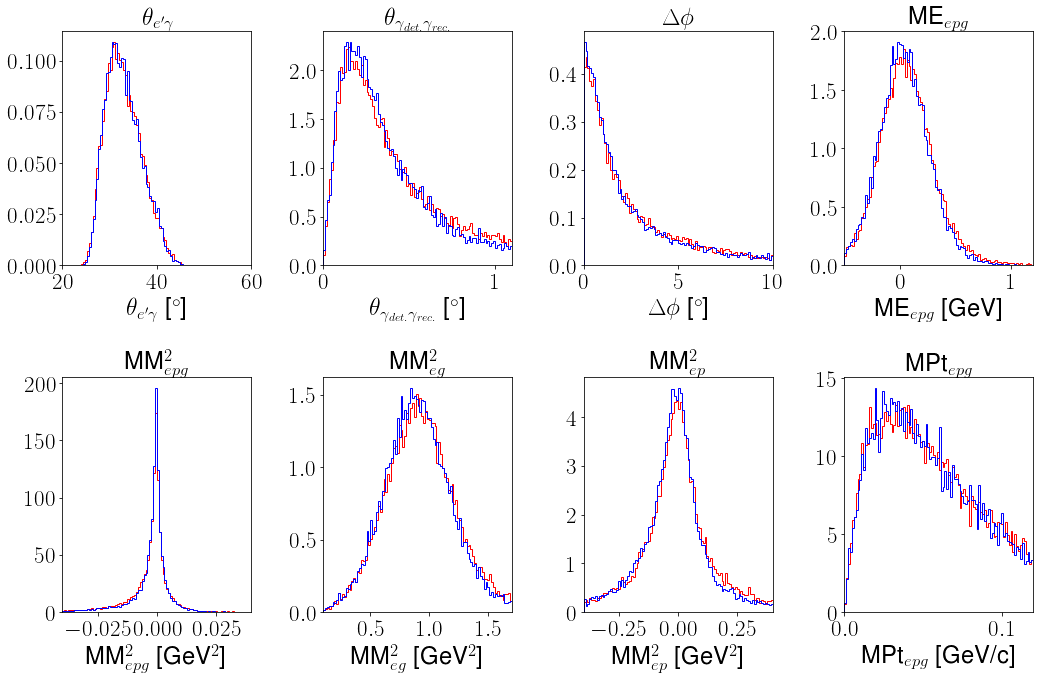

<Figure size 432x288 with 0 Axes>

In [10]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [20, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
binends = [60, 1.1, 10, 1.2, 0.04, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
	for xind in range(0,4):
		ind = 4*yind + xind
		start = binstarts[ind]
		end = binends[ind]
		bins = np.linspace(start, end, 101)
# 		axs[yind, xind].hist(dvcsFDFD[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
		axs[yind, xind].hist(dvcsFDFD_mc[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
		axs[yind, xind].hist(dvcsFDFD_mc2[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
		axs[yind, xind].set_title(title[ind])
		axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
		axs[yind, xind].set_xlim([start, end])
plt.tight_layout()
plt.show()
# plt.savefig("simComparison_1.pdf")
plt.clf()

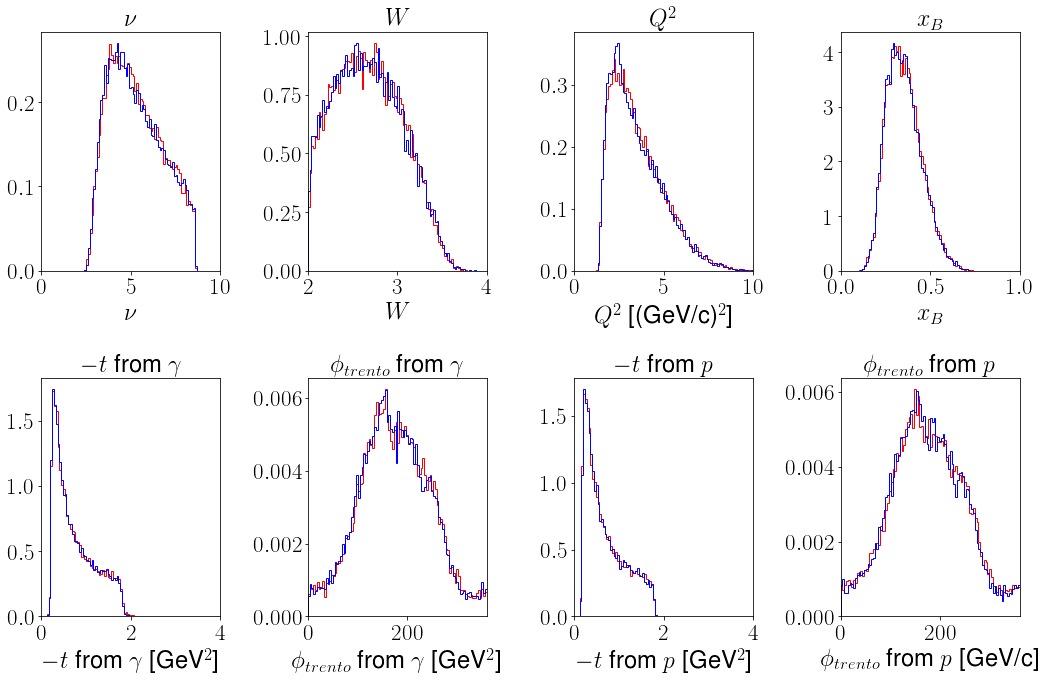

<Figure size 432x288 with 0 Axes>

In [11]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2", "t1", "phi1"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$"+" from "+r"$\gamma$", r"$\phi_{trento}$"+" from "+r"$\gamma$", r"$-t$"+" from "+r"$p$", r"$\phi_{trento}$"+" from "+r"$p$" ]
unit = [None, None, GeVc2, None, GeV2, GeV2, GeV2, GeVc]
binstarts = [0, 2, 0, 0, 0, 0, 0 , 0]
binends = [10, 4, 10, 1, 4, 360, 4, 360]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
	for yind in range(0, 2):
		ind =xind+4*yind
		start = binstarts[ind]
		end = binends[ind]
		bins = np.linspace(start, end, 101)
# 		axs[yind, xind].hist(dvcsFDFD[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
		axs[yind, xind].hist(dvcsFDFD_mc[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
		axs[yind, xind].hist(dvcsFDFD_mc2[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
		axs[yind, xind].set_title(title[ind])
		axs[yind, xind].set_xlim([start, end])
		if (unit[ind]):
			axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
		else:
			axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
# plt.savefig("simComparison_2.pdf")
plt.clf()

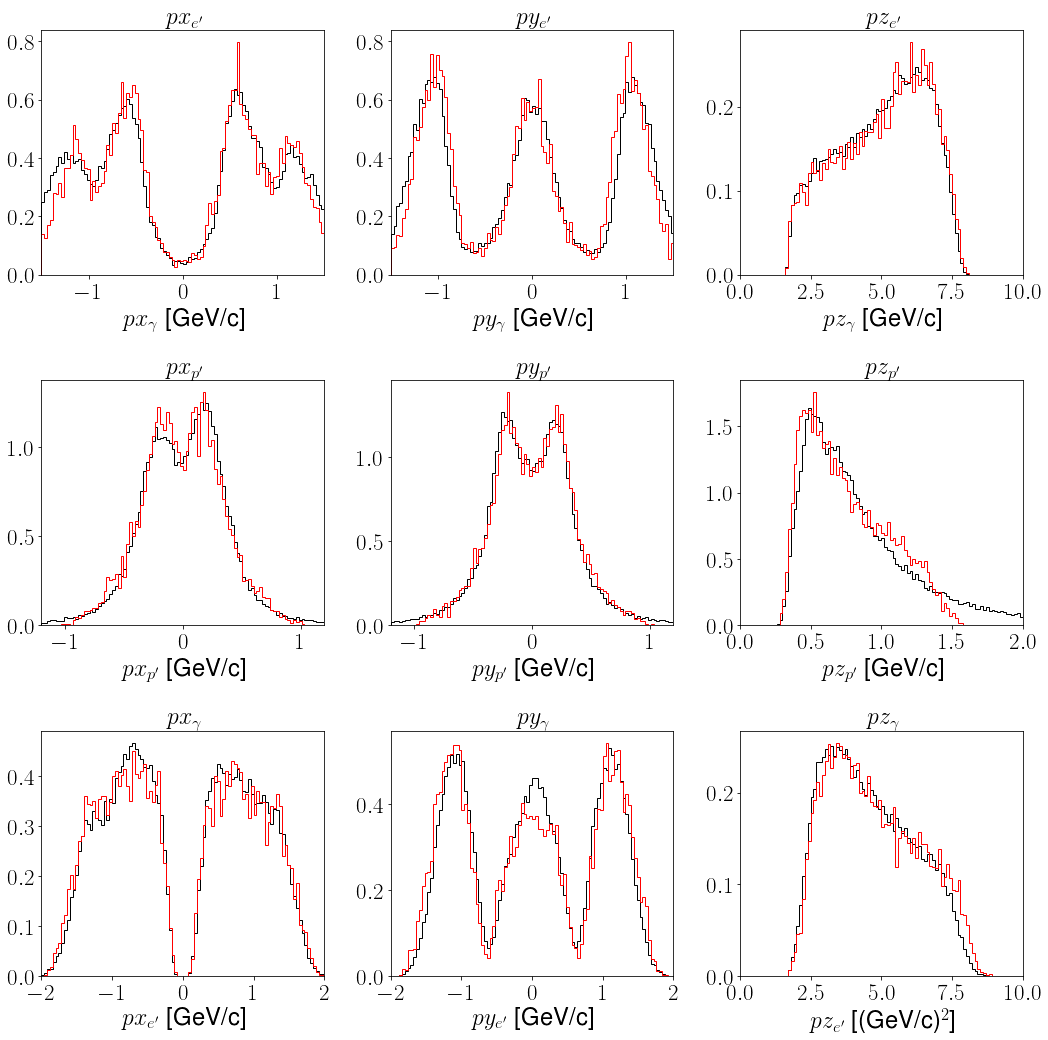

<Figure size 432x288 with 0 Axes>

In [85]:
varstoplot = ["Epx", "Epy", "Epz", "Ppx", "Ppy", "Ppz", "Gpx", "Gpy", "Gpz"]
title = [r"$px_{e'}$", r"$py_{e'}$", r"$pz_{e'}$", r"$px_{p'}$", r"$py_{p'}$", r"$pz_{p'}$", r"$px_{\gamma}$", r"$py_{\gamma}$", r"$pz_{\gamma}$" ]
unit = [GeVc, GeVc, GeVc2, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc]
binstarts = [-1.5, -1.5, 0, -1.2, -1.2, 0, -2, -2, 0]
binends = [1.5, 1.5, 10, 1.2, 1.2, 2, 2, 2, 10]
fig, axs = plt.subplots(3, 3, figsize = (15,15))
for xind in range(0,3):
	for yind in range(0, 3):
		ind = xind+3*yind
		start = binstarts[ind]
		end = binends[ind]
		bins = np.linspace(start, end, 101)
		axs[yind, xind].hist(dvcsFDFD[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
		axs[yind, xind].hist(dvcsFDFD_mc[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
# 		axs[yind, xind].hist(dvcsFDFD_mc2[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
		axs[yind, xind].set_title(title[ind])
		axs[yind, xind].set_xlim([start, end])
		if (unit[ind]):
			axs[2-yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
		else:
			axs[2-yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
# plt.savefig("simComparison_3.pdf")
plt.clf()

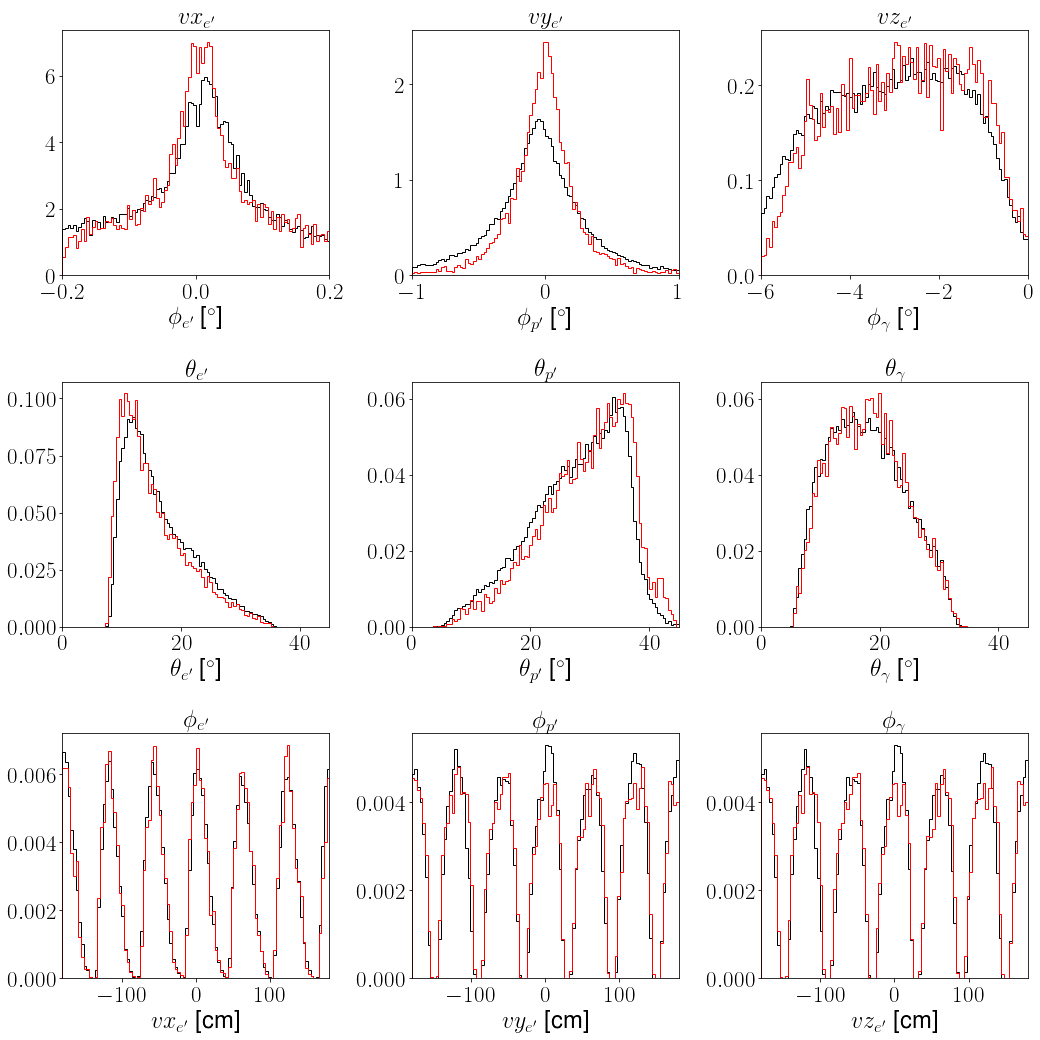

<Figure size 432x288 with 0 Axes>

In [86]:
varstoplot = ["Evx", "Evy", "Evz", "Etheta", "Ptheta", "Gtheta", "Ephi", "Gphi", "Gphi"]
title = [r"$vx_{e'}$", r"$vy_{e'}$", r"$vz_{e'}$", r"$\theta_{e'}$", r"$\theta_{p'}$", r"$\theta_{\gamma}$", r"$\phi_{e'}$", r"$\phi_{p'}$", r"$\phi_{\gamma}$" ]
unit = ["cm", "cm", "cm", degree, degree, degree, degree, degree, degree]
binstarts = [-0.2, -1, -6, 0, 0, 0, -180, -180, -180]
binends = [0.2, 1, 0, 45, 45, 45, 180, 180, 180]
fig, axs = plt.subplots(3, 3, figsize = (15,15))
for xind in range(0,3):
	for yind in range(0, 3):
		ind = xind+3*yind
		start = binstarts[ind]
		end = binends[ind]
		bins = np.linspace(start, end, 101)
		axs[yind, xind].hist(dvcsFDFD[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
		axs[yind, xind].hist(dvcsFDFD_mc[varstoplot[ind]]+0.007, bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
# 		axs[yind, xind].hist(dvcsFDFD_mc2[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
		axs[yind, xind].set_title(title[ind])
		axs[yind, xind].set_xlim([start, end])
		if (unit[ind]):
			axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
		else:
			axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
# plt.savefig("simComparison_4.pdf")
plt.clf()

In [223]:
# mean = dvcs["Evy"].mean()
mean = 0
asym = dvcs[(dvcs["Evy"]>mean-1) & (dvcs["Evy"]<mean+1)]
print(mean)
for i in range(0, 10):
    mean = asym["Evy"].mean()
    asym = dvcs[(dvcs["Evy"]>mean-0.3) & (dvcs["Evy"]<mean+0.3)]
    print(mean)

0
-0.03254355
-0.0343584
-0.03540255
-0.036026884
-0.036365446
-0.036574893
-0.036686134
-0.036746208
-0.03678519
-0.036815237


In [159]:
data, bins = np.histogram(dvcs["Evx"], bins =np.linspace(-1+mean, 1+mean, 101))
bins[np.argmax(data)]

0.01243469117209317

<AxesSubplot:>

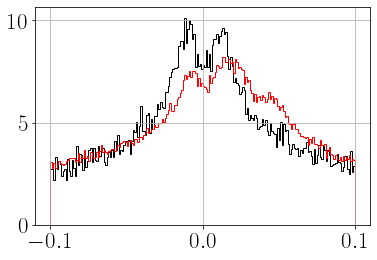

In [88]:
(dvcs_mc["Evx"]).hist(bins=np.linspace(-0.1, 0.1, 201), density=True, histtype='stepfilled', facecolor='none', edgecolor='k')
(dvcs["Evx"]).hist(bins=np.linspace(-0.1, 0.1, 201), density=True, histtype='stepfilled', facecolor='none', edgecolor='r')

In [6]:
#         hists.computeIfAbsent("/epg/corr/tmin", h_Q2_xB).fill(xB,Q2,tmin)
#         hists.computeIfAbsent("/epg/corr/tcol", h_Q2_xB).fill(xB,Q2,tcol)

#         hists.computeIfAbsent("/epg/corr/pro_theta_mom_xB_${xBbin}_Q2_${Q2bin}", h_theta_mom).fill(pro.p(), Math.toDegrees(pro.theta()))
#         hists.computeIfAbsent("/epg/corr/pro_phi_mom_xB_${xBbin}_Q2_${Q2bin}", h_phi_mom).fill(pro.p(), pro_phi_convention)
#         hists.computeIfAbsent("/epg/corr/pro_theta_phi_xB_${xBbin}_Q2_${Q2bin}", h_theta_phi).fill(pro_phi_convention, Math.toDegrees(pro.theta()))
#         hists.computeIfAbsent("/epg/corr/gam_phi_mom_xB_${xBbin}_Q2_${Q2bin}", h_phi_mom).fill(gam.p(), gam_phi_convention)
#         hists.computeIfAbsent("/epg/corr/gam_theta_mom_xB_${xBbin}_Q2_${Q2bin}", h_theta_mom).fill(gam.p(), Math.toDegrees(gam.theta()))
#         hists.computeIfAbsent("/epg/corr/gam_theta_phi_xB_${xBbin}_Q2_${Q2bin}", h_theta_phi).fill(gam_phi_convention, Math.toDegrees(gam.theta()))

#         hists.computeIfAbsent("/epg/corr/pro_theta_t_xB_${xBbin}_Q2_${Q2bin}", h_theta_t).fill(t2, Math.toDegrees(pro.theta()))
#         hists.computeIfAbsent("/epg/corr/pro_phi_t_xB_${xBbin}_Q2_${Q2bin}", h_phi_t).fill(t2, pro_phi_convention)
#         hists.computeIfAbsent("/epg/corr/pro_theta_trento_xB_${xBbin}_Q2_${Q2bin}", h_theta_trento).fill(TrentoAng2, Math.toDegrees(pro.theta()))
#         hists.computeIfAbsent("/epg/corr/pro_phi_trento_xB_${xBbin}_Q2_${Q2bin}", h_phi_trento).fill(TrentoAng2, pro_phi_convention)
#         hists.computeIfAbsent("/epg/corr/gam_theta_t_xB_${xBbin}_Q2_${Q2bin}", h_theta_t).fill(t2, Math.toDegrees(gam.theta()))
#         hists.computeIfAbsent("/epg/corr/gam_phi_t_xB_${xBbin}_Q2_${Q2bin}", h_phi_t).fill(t2, gam_phi_convention)
#         hists.computeIfAbsent("/epg/corr/gam_theta_trento_xB_${xBbin}_Q2_${Q2bin}", h_theta_trento).fill(TrentoAng2, Math.toDegrees(gam.theta()))
#         hists.computeIfAbsent("/epg/corr/gam_phi_trento_xB_${xBbin}_Q2_${Q2bin}", h_phi_trento).fill(TrentoAng2, gam_phi_convention)

#         hists.computeIfAbsent("/epg/corr/t_t", h_t_t).fill(t, t2)
#         hists.computeIfAbsent("/epg/corr/trento_trento", h_trento_trento).fill(TrentoAng, TrentoAng2)

In [77]:
dvcs["neweSector"] = getPhi(ele)+80
dvcs["neweSector"] = dvcs["neweSector"]//60
dvcs["neweSector"] = np.where(dvcs["neweSector"]<=0, dvcs["neweSector"]+6, dvcs["neweSector"])

In [35]:
fname = "/Users/sangbaek/Dropbox (MIT)/data/dvcsgen.dat"
epgLund = epgFromLund(fname, 10)


On event 0.0


In [173]:
import importlib
import utils
importlib.reload(utils.epg)
from utils.epg import *


In [50]:
dvcsLund = epgLund.getDVCS()

In [40]:
xB_edges = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,\
			0.45, 0.5, 0.55, 0.6, 0.7, 0.85, 1]
Q2_edges = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0,\
			4.5, 5.0, 5.5, 6.0, 7.0, 8.0, 9.0, 12.]
t_edges = [0.09, 0.15, 0.20, 0.3, 0.4, 0.60, 1.00, 1.5, 2.0]
phi_edges = np.linspace(0, 360, 31)

In [37]:
fname_gen = "~/Dropbox (MIT)/data/MC/nonradVzCorrInbMC.root"
epg_gen = epgFromROOT(fname_gen, mc=True)
dvcs_gen = epg_gen.getDVCS()

In [133]:
dvcs5038 = dvcsFDFD[dvcsFDFD["RunNum"]<5200]
dvcs5419 = dvcsFDFD[dvcsFDFD["RunNum"]>5300]

In [33]:
dvcs["RunNum"].unique()

array([5032, 5036, 5038, 5039, 5040, 5041, 5043, 5045, 5046, 5047, 5051,
       5052, 5053, 5116, 5117, 5119, 5120, 5124, 5125, 5126, 5127, 5128,
       5129, 5130, 5137, 5138, 5139, 5153, 5158, 5159, 5160, 5162, 5163,
       5164, 5165, 5166, 5167, 5168, 5169, 5180, 5181, 5182, 5183, 5189,
       5190, 5191, 5193, 5194, 5195, 5196, 5197, 5198, 5199, 5200, 5201,
       5202, 5203, 5204, 5205, 5206, 5208, 5211, 5212, 5215, 5216, 5219,
       5220, 5221, 5222, 5223, 5225, 5229, 5230, 5231, 5232, 5233, 5234,
       5235, 5237, 5238, 5239, 5247, 5248, 5249, 5250, 5252, 5253, 5257,
       5258, 5259, 5261, 5262, 5300, 5301, 5302, 5303, 5304, 5305, 5306,
       5307, 5310, 5311, 5315, 5316, 5317, 5318, 5319, 5320, 5323, 5324,
       5325, 5333, 5334, 5335, 5336, 5339, 5340, 5341, 5342, 5343, 5344,
       5345, 5346, 5347, 5349, 5351, 5354, 5355, 5356, 5357, 5358, 5359,
       5360, 5361, 5362, 5366, 5367, 5368, 5369, 5370, 5371, 5372, 5373,
       5374, 5375, 5376, 5377, 5378, 5379, 5380, 53

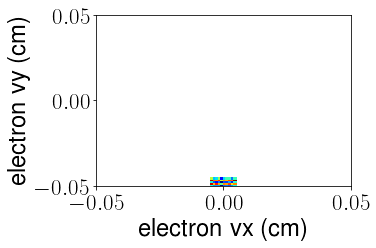

In [179]:
cmap = copy(plt.cm.get_cmap("jet"))
# plt.hist2d(dvcs_mc["Evx"], dvcs_mc["Evy"], bins = [np.linspace(-0.05, 0.05, 101), np.linspace(-0.05, 0.05, 101)], cmin=1, cmap=cmap)
plt.hist2d(dvcs_gen["MCEvx"], dvcs_gen["MCEvy"], bins = [np.linspace(-0.05, 0.05, 101), np.linspace(-0.05, 0.05, 101)], cmin=1, cmap=cmap)
# plt.hist2d(dvcsFDFD["Evx"], dvcsFDFD["Evy"], bins = [np.linspace(-0.2, 0.2, 101), np.linspace(-0.2, 0.2, 101)], cmin=1, cmap=cmap)
# plt.hist2d(dvcs5038["Evx"], dvcs5038["Evy"], bins = [np.linspace(-0.1, 0.1, 101), np.linspace(-0.05, -0.03, 101)], cmin=1, cmap = cmap)
# plt.hist2d(dvcs5419["Evx"], dvcs5419["Evy"], bins = [np.linspace(-0.2, 0.2, 16), np.linspace(-0.2, 0.2, 16)], cmin=1, cmap = cmap)
# plt.hist2d(dvcsoutb["Evx"], dvcsoutb["Evy"], bins = [np.linspace(0.032, 0.042, 11), np.linspace(-0.03, -0.02, 11)], cmin=1, cmap = cmap)
plt.xlabel("electron vx (cm)")
plt.ylabel("electron vy (cm)")
# plt.hist(np.sqrt(dvcs_gen["Evx"]**2+(dvcs_gen["Evy"]+0.05)**2))
plt.tight_layout()
plt.show()
# plt.savefig("vyvxover5300.pdf")
# plt.savefig("vyvxoutb.pdf")

In [172]:
dvcs_gen

,MCEpx,MCEpy,MCEpz,MCEvz,MCPpx,MCPpy,MCPpz,event,MCGpx,MCGpy,MCGpz
0,0.7216,-0.3870,1.4744,-3.8762,-0.3764,0.0857,0.3635,0,-0.3452,0.3013,8.7661
1,-0.5292,0.6878,5.1308,-3.3738,0.1884,0.2855,0.2705,1,0.3409,-0.9733,5.2027
2,0.6453,-0.8665,6.5992,-0.7538,-0.0181,0.3365,0.2723,2,-0.6272,0.5300,3.7324
3,-0.6574,-0.1302,2.8128,-2.4003,0.3034,0.2338,0.1784,3,0.3540,-0.1037,7.6128
4,0.4691,0.1015,1.0760,-1.5983,-0.2358,0.3656,0.2404,4,-0.2333,-0.4670,9.2876
...,...,...,...,...,...,...,...,...,...,...,...
140806,0.7191,0.1190,2.3531,-4.6102,-0.3605,0.0869,0.2140,140806,-0.3587,-0.2059,8.0369
140807,-0.4124,-0.8290,3.8288,-4.0630,0.0429,0.7186,0.4488,140807,0.3695,0.1104,6.3264
140808,0.7446,-0.5016,3.3305,-1.6130,-0.8899,0.2187,0.6536,140808,0.1452,0.2830,6.6199
140809,-0.0283,-0.6387,1.8227,-5.1748,-0.3441,0.1570,0.2296,140809,0.3724,0.4817,8.5517


<AxesSubplot:>

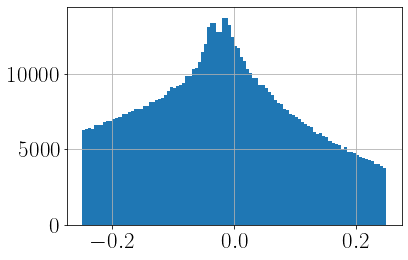

In [76]:
dvcsoutb["Evy"].hist(bins=np.linspace(-0.25, 0.25, 101))

In [80]:
import uproot
file = uproot.open("~/Dropbox (MIT)/data/dvcs_inb.root")
tree = file["T"]
df_ele = pd.DataFrame()
RunNum = tree["RunNum"].array(library="pd", entry_stop=10)

In [81]:
RunNum

0    5032
1    5032
2    5032
3    5032
4    5032
5    5032
6    5032
7    5032
8    5032
9    5032
dtype: int64

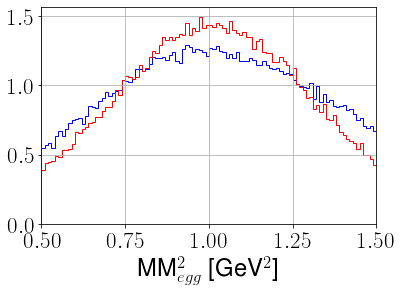

In [806]:
fig, ax = plt.subplots()
dvpi0CD["MM2_egg"].hist(bins=np.linspace(0.5, 1.5, 101), density=True, histtype='stepfilled', facecolor='none', edgecolor='b', ax = ax)
dvpi0FD["MM2_egg"].hist(bins=np.linspace(0.5, 1.5, 101), density=True, histtype='stepfilled', facecolor='none', edgecolor='r', ax = ax)
ax.set_xlabel("MM"+r"${}^{2}_{egg}$"+" [GeV"+r"${}^{2}$"+"]")
ax.set_xlim([0.5, 1.5])
# ax.set_ylim([0, 2.0])
# dvpi0CD["ME_epgg"].hist(bins=np.linspace(-0.4, 0.4, 101), density=True, histtype='stepfilled', facecolor='none', edgecolor='b', ax = ax)
# dvpi0FD["ME_epgg"].hist(bins=np.linspace(-0.4, 0.4, 101), density=True, histtype='stepfilled', facecolor='none', edgecolor='r', ax = ax)
# ax.set_xlabel("ME"+r"${}_{epgg}$"+" [GeV]")
# ax.set_xlim([-.4, .4])
plt.show()
# dvcsCD["ME_epg"].hist(bins=np.linspace(-0.4, 0.4, 101), density=True, histtype='stepfilled', facecolor='none', edgecolor='b')
# dvcsFD["ME_epg"].hist(bins=np.linspace(-0.4, 0.4, 101), density=True, histtype='stepfilled', facecolor='none', edgecolor='g')

In [158]:
dvcs_data = dvcsFDFD[(dvcsFDFD["xB"]>0.3)&(dvcsFDFD["xB"]<0.35)&(dvcsFDFD["Q2"]>3)&(dvcsFDFD["Q2"]<3.5)&(dvcsFDFD["t2"]>0.4)&(dvcsFDFD["t2"]<0.6)]
dvcs_rec = dvcsFDFD_mc[(dvcsFDFD_mc["xB"]>0.3)&(dvcsFDFD_mc["xB"]<0.35)&(dvcsFDFD_mc["Q2"]>3)&(dvcsFDFD_mc["Q2"]<3.5)&(dvcsFDFD_mc["t2"]>0.4)&(dvcsFDFD_mc["t2"]<0.6)]
dvcs_generated = dvcs_gen[(dvcs_gen["xB"]>0.3)&(dvcs_gen["xB"]<0.35)&(dvcs_gen["Q2"]>3)&(dvcs_gen["Q2"]<3.5)&(dvcs_gen["t2"]>0.4)&(dvcs_gen["t2"]<0.6)]

In [159]:
phi_data = dvcs_data["phi2"]
phi_rec = dvcs_rec["phi2"]
phi_gen = dvcs_gen["phi2"]

In [160]:
phi_edges = np.linspace(0,360, 31)
phiData_entries, bins = np.histogram(phi_data, bins=phi_edges)
phiRec_entries, bins = np.histogram(phi_rec, bins=phi_edges)
phiGen_entries, bins = np.histogram(phi_gen, bins=phi_edges)
binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                        for i in range(len(bins) - 1)])


In [161]:
phiGen_entries

array([272634, 192936, 142105, 113644,  92937,  77756,  67934,  60396,
        54463,  49953,  45866,  43182,  40964,  40117,  39343,  39130,
        39547,  41083,  43210,  46082,  49784,  54396,  60850,  68212,
        78629,  92680, 113286, 142815, 193620, 272038])

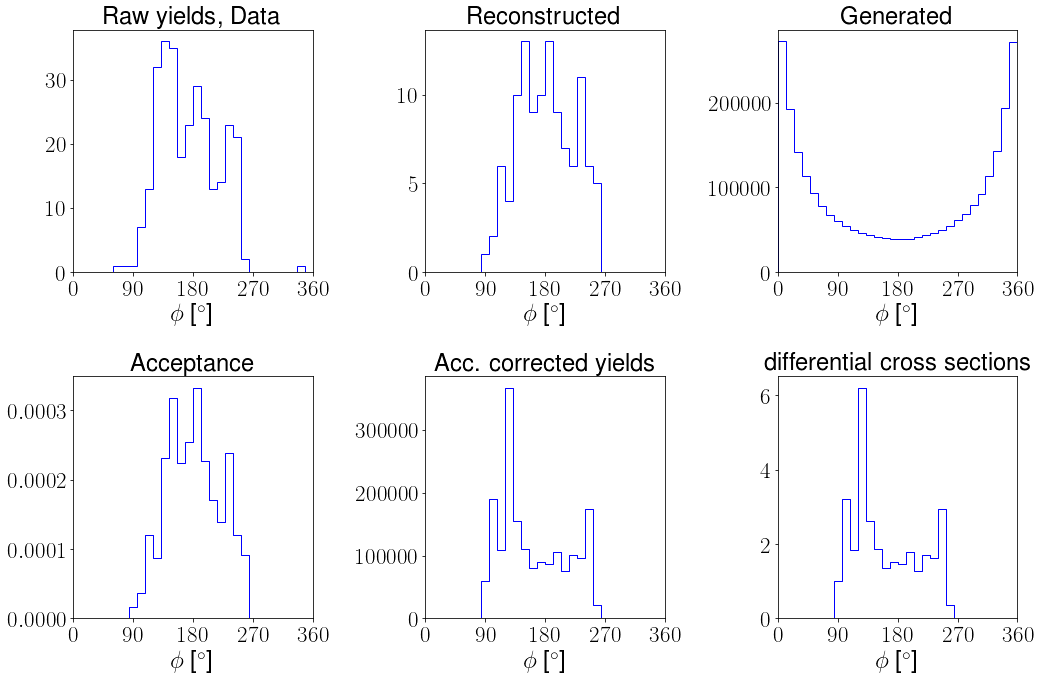

In [162]:
fig, axs = plt.subplots(2, 3, figsize = (15,10))
axs[0,0].hist(phi_data, bins= phi_edges, histtype='stepfilled', facecolor='none', edgecolor='b')
axs[0,0].set_title("Raw yields, Data")
axs[0,1].hist(phi_rec, bins= phi_edges, histtype='stepfilled', facecolor='none', edgecolor='b')
axs[0,1].set_title("Reconstructed")
axs[0,2].hist(phi_gen, bins= phi_edges, histtype='stepfilled', facecolor='none', edgecolor='b')
axs[0,2].set_title("Generated")
acc = phiRec_entries/phiGen_entries
axs[1,0].step(binscenters, phiRec_entries/phiGen_entries, where='mid',color='b', linewidth=1)
axs[1,0].bar(binscenters, phiRec_entries/phiGen_entries, width=np.diff(bins), color = 'w', facecolor='w')
axs[1,0].set_title("Acceptance")
accCorrectedData = acc
for ind, val in enumerate(acc):
    if val ==0:
        accCorrectedData[ind] = 0
    else:
        accCorrectedData[ind] = phiData_entries[ind]/val
axs[1,1].step(binscenters, accCorrectedData, where='mid',color='b', linewidth=1)
axs[1,1].bar(binscenters, accCorrectedData, width=np.diff(bins), color = 'w', facecolor='w')
axs[1,1].set_title("Acc. corrected yields")
axs[1,2].step(binscenters, accCorrectedData/56.5/0.05/0.5/0.2/(np.pi*2/30)/10**6, where='mid',color='b', linewidth=1)
axs[1,2].bar(binscenters, accCorrectedData/56.5/0.05/0.5/0.2/(np.pi*2/30)/10**6, width=np.diff(bins), color = 'w', facecolor='w')
axs[1,2].set_title("differential cross sections")

for ax in axs.reshape(6,):
    ax.set_xlim([0, 360])
    ax.set_xticks(np.linspace(0, 360, 5))
    ax.set_xlabel("$\phi$"+" ["+r"${}^{\circ}$"+"]")
plt.tight_layout()
plt.savefig("onebin.pdf")
# for xind in range(0,3):
# 	for yind in range(0, 3):
# 		ind = xind+3*(2-yind)
# 		start = binstarts[ind]
# 		end = binends[ind]
# 		bins = np.linspace(start, end, 101)
# 		axs[2-yind, xind].hist(dvcsFDFD[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
# 		axs[2-yind, xind].hist(dvcsFDFD_mc[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
# # 		axs[2-yind, xind].hist(dvcsFDFD_mc2[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
# 		axs[2-yind, xind].set_title(title[ind])
# 		axs[2-yind, xind].set_xlim([start, end])
# 		if (unit[ind]):
# 			axs[2-yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
# 		else:
# 			axs[2-yind, xind].set_xlabel(title[ind])
# plt.tight_layout()
# plt.savefig("simComparison_3.pdf")
# plt.clf()

In [117]:
acc

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.47201696e-05, 9.93443274e-05,
       2.20333070e-04, 3.80357536e-04, 6.75881917e-04, 7.41049511e-04,
       9.03232106e-04, 5.48395942e-04, 6.10019571e-04, 8.17786864e-04,
       8.09163780e-04, 5.11160334e-04, 4.62855820e-04, 6.07612517e-04,
       4.01735497e-04, 2.02220752e-04, 3.28677075e-05, 1.46601771e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [166]:
len(dvcsFDFD_mc)

17335

In [165]:
dvcs_rec

,Epx,Epy,Epz,Evx,Evy,Evz,Esector,event,Ppx,Ppy,...,MPt,coneAngle,reconGam,coplanarity,Etheta,Ephi,Ptheta,Pphi,Gtheta,Gphi
3642,-0.803068,0.898445,4.527838,0.840016,0.737281,-1.415328,3,2961,-0.366098,0.143577,...,0.036885,31.380072,0.563000,4.874857,14.903261,131.791693,31.467299,158.585778,16.510022,-42.998230
5093,0.533054,-1.160346,5.320735,0.106649,0.064674,-2.754504,6,4153,-0.026764,-0.274055,...,0.028270,32.060719,0.528042,2.628233,13.495262,-65.326322,23.841902,-95.577753,18.594801,109.773565
5827,-1.202346,0.123422,4.532919,0.028675,0.183802,-2.732894,4,4747,-0.324842,-0.204003,...,0.025210,30.691710,0.296962,2.087613,14.930064,174.139056,30.951039,-147.870946,15.877336,3.957460
7363,-1.258730,0.132540,5.577965,0.008698,0.020701,-3.461818,4,5990,-0.257837,0.224891,...,0.010595,32.356726,0.102145,0.732605,12.784431,173.989119,26.682166,138.904258,19.638617,-13.414743
8518,-0.679849,-1.035289,4.748412,0.764455,-0.483861,-3.581278,5,6919,0.300212,-0.255478,...,0.094566,28.323159,0.842167,6.458280,14.619045,-123.291924,36.227035,-40.397534,14.165664,77.045574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337513,1.293751,0.131542,5.357884,0.075152,-0.867095,-3.474720,1,272661,0.034587,0.394969,...,0.022391,31.086599,0.399348,2.940258,13.642546,5.805572,30.590943,84.995463,17.741847,-158.454173
338095,0.413035,-1.164323,4.924902,0.175966,0.078312,-2.490469,6,273135,-0.153376,-0.332262,...,0.037165,30.833673,0.171310,0.922479,14.082088,-70.468211,30.809848,-114.778532,16.862765,99.893960
341214,-0.722799,-1.058132,5.413782,-0.155400,0.125254,-3.080272,5,275631,0.037125,-0.335657,...,0.026618,32.211864,0.068128,0.689348,13.316776,-124.336577,26.997364,-83.688496,18.972620,63.626582
347443,-1.245867,-0.018084,4.952131,0.009634,-0.113383,-3.705595,4,280616,-0.230297,0.213674,...,0.008855,30.530551,0.186758,0.934966,14.122954,-179.168399,29.244592,137.144331,16.491066,-7.556652


In [58]:
len(df_epg[df_epg["Pstat"]>4000])

2267227